In [4]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import skimage

In [9]:
img = data.astronaut()

In [10]:
skimage.io.imsave('img.png',img)

In [11]:
img_cv = cv2.imread('img.png',cv2.IMREAD_UNCHANGED)

In [12]:
np.mean(np.abs(img-img_cv[:,:,::-1]))

0.0

In [13]:
cv2.imwrite('img.jpg', img_cv)

True

In [14]:
img_jpeg = cv2.imread('img.jpg',cv2.IMREAD_UNCHANGED)

In [18]:
np.mean(np.abs(img_jpeg[:,:,::-1]-img))

94.49695078531902

In [19]:
np.save('img.npy',img)

In [20]:
%timeit np.load('img.npy')

223 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit cv2.imread('img.png',cv2.IMREAD_UNCHANGED)

5.61 ms ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit cv2.imread('img.jpg',cv2.IMREAD_UNCHANGED)

2.14 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
ls -l

total 833340
-rw-r--r-- 1 will will 851576569 Nov 25 21:59 all.zip
-rw-r--r-- 1 will will     99308 Dec  1 16:34 img.jpg
-rw-r--r-- 1 will will    786560 Dec  1 16:35 img.npy
-rw-r--r-- 1 will will    424520 Dec  1 16:34 img.png
-rw-r--r-- 1 will will    410551 Nov 25 21:50 Keras-master.zip
-rw-r--r-- 1 will will      6878 Dec  1 16:36 kernel.ipynb
-rw-r--r-- 1 will will      3297 Nov 25 21:06 tensorflow-gpu-1.12.0-h0d30ee6_0.tar.bz2


Load chunks

In [24]:
block = np.tile(img,(500,1,1))

In [25]:
np.save('img.npy',img)

In [26]:
np.save('chunks.npy',block)

In [27]:
%timeit np.load('img.npy')

225 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
import time

In [29]:
time_lst = []
time_step = 1000
for i in range(1,time_step):
    block = np.tile(img,(i,1,1))
    np.save('chunks.npy',block)
    t0=time.time()
    for _ in range(10):
        _ = np.load('chunks.npy')
    time_lst.append(time.time()-t0)

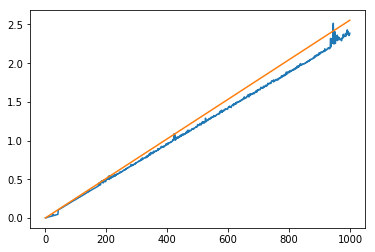

In [30]:
plt.plot(np.arange(1,time_step),time_lst,np.arange(1,time_step),time_lst[0]*np.arange(1,time_step))